# Lights Out を解く
参考：https://qiita.com/LyricalMaestro0/items/2bd9ef55cb49fe788179  
参考：http://www.ic-net.or.jp/home/takaken/nt/light/light2.html

In [1]:
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. N*Mサイズを指定する。

In [2]:
random_flag = False

if random_flag:
    # ランダム版
    n = random.randint(1, 10)
    m = random.randint(1, 10)
else:
    n = 6
    m = 6
    
print(n, m)

6 6


## 2. 初期の盤面を決定

In [3]:
init_state = random.sample(range(n*m), k=random.randint(1,n*m))
bord_state = np.array([1 if i in init_state else 0 for i in range(n*m)])

print(sorted(init_state))
print(bord_state)

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35]
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


## 3. 状態の表示

In [4]:
def display_state(n, m, states, color='blue'):
    # config
    plt.figure(figsize=(n,m))
    plt.xlim(0,n)
    plt.ylim(0,m)
    plt.tick_params(axis='both', which='both', bottom=False, top=False,
                    labelbottom=False, right=False, left=False, labelleft=False)

    # grid
    plt.xticks(range(n))
    plt.yticks(range(m))
    plt.grid(which='major')

    # plot ON-OFF state
    for i, state in enumerate(states):
        if state:
            plt.fill_between((i%n, i%n+1), m-i//n-1, m-i//n, facecolor=color)

    plt.show()

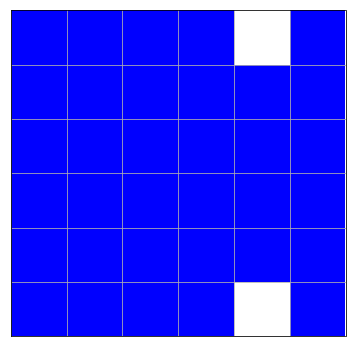

In [5]:
display_state(n, m, bord_state)

## 4. solver

### 4.1 各所押下時の挙動を列挙

In [6]:
push_state = []

for i in range(m):
    for j in range(n):
        tmp = np.array([[0]*n]*m)
        tmp[i, j] = 1
        for k in [j-1, j+1]:
            if 0 <= k < n:
                tmp[i, k] = 1
        for k in [i-1, i+1]:
            if 0 <= k < m:
                tmp[k, j] = 1
        push_state.append(tmp.reshape(-1))

push_state = np.array(push_state)
print(push_state)

[[1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 1 1]]


#### 一覧表示

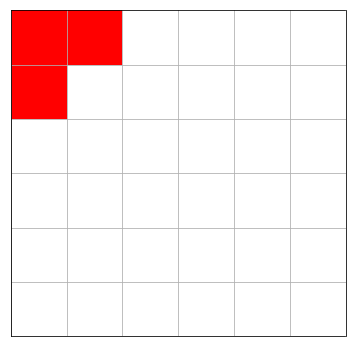

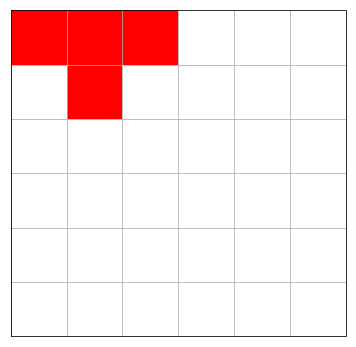

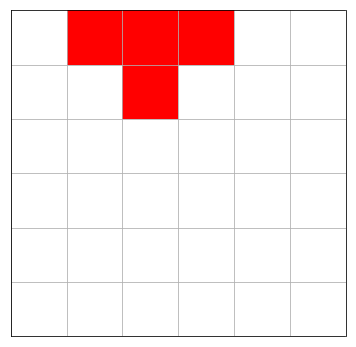

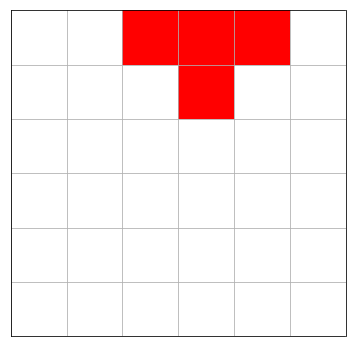

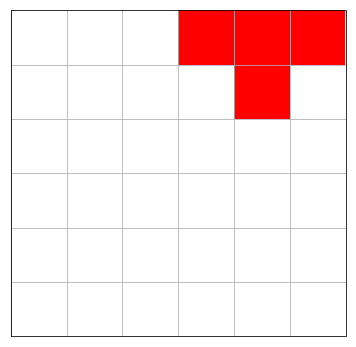

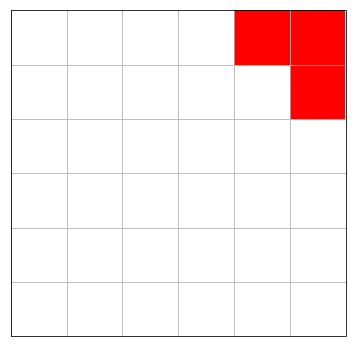

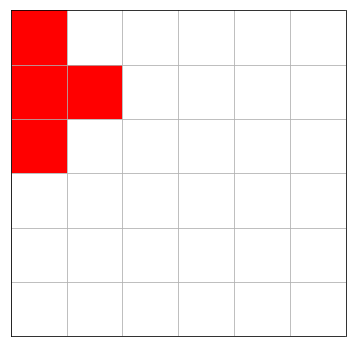

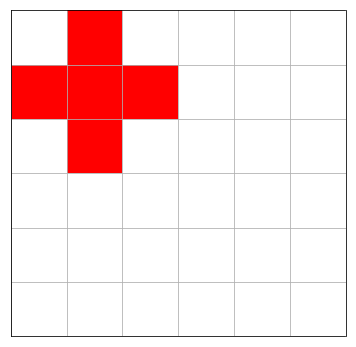

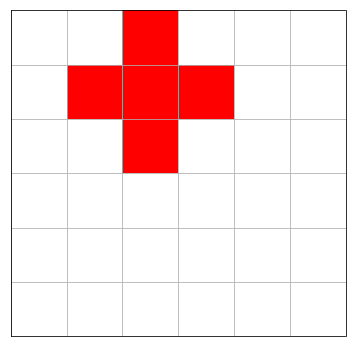

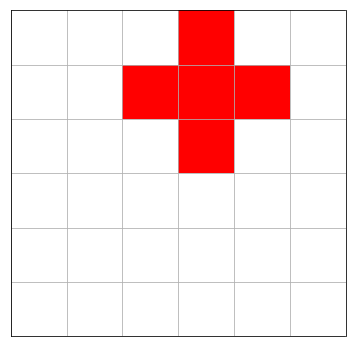

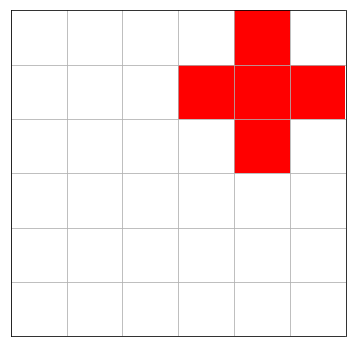

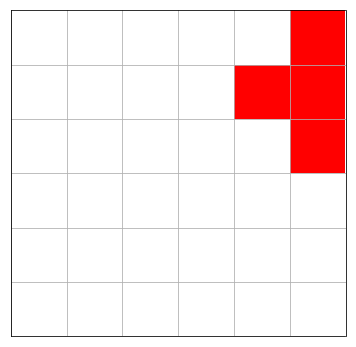

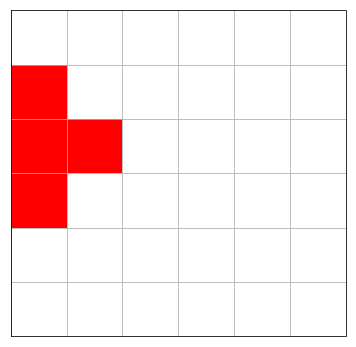

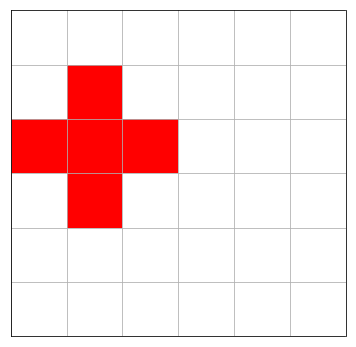

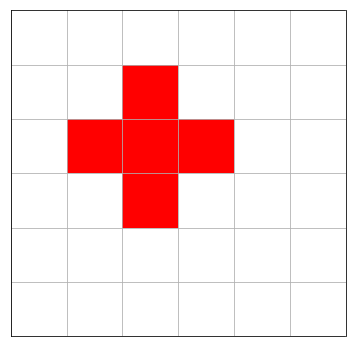

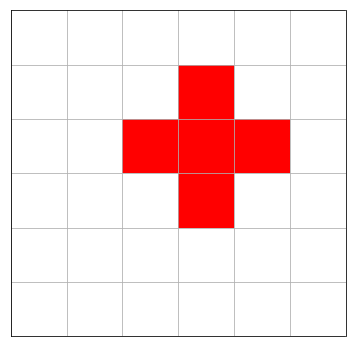

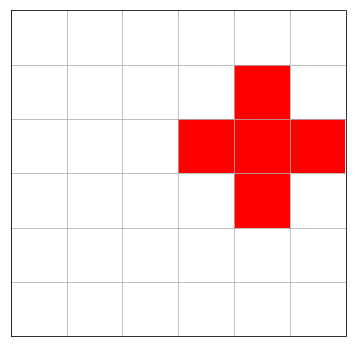

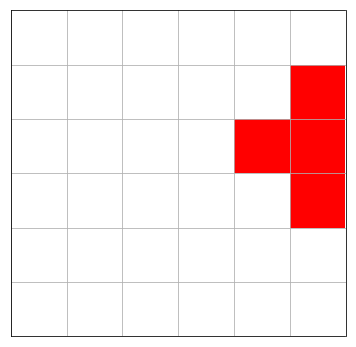

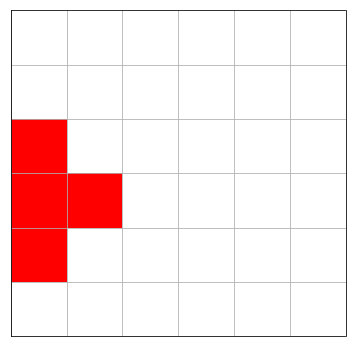

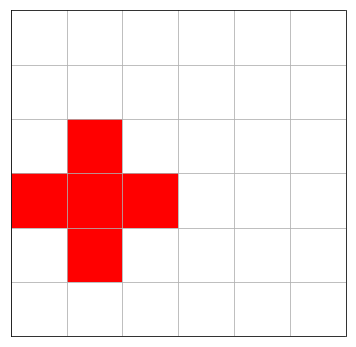

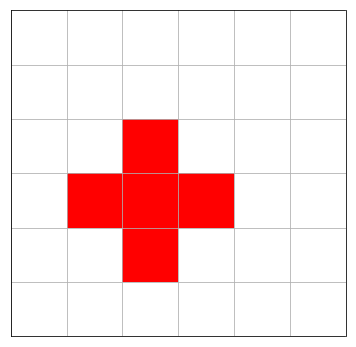

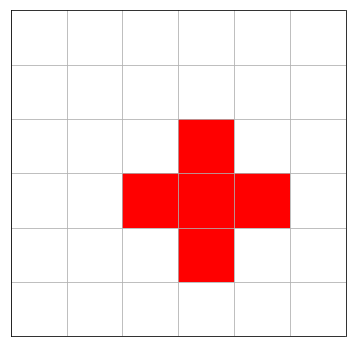

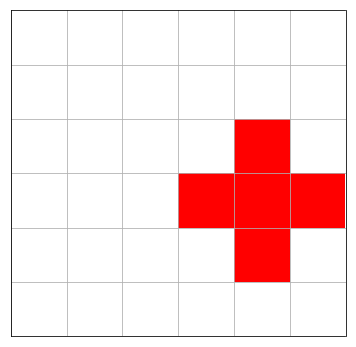

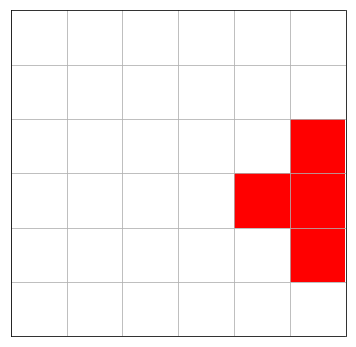

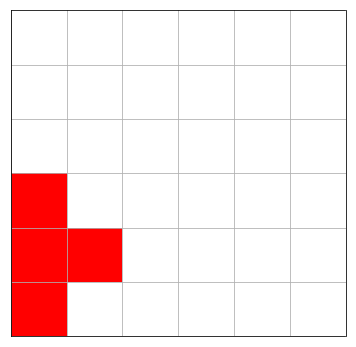

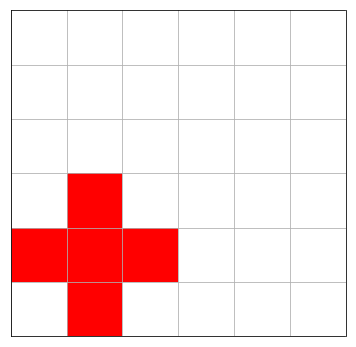

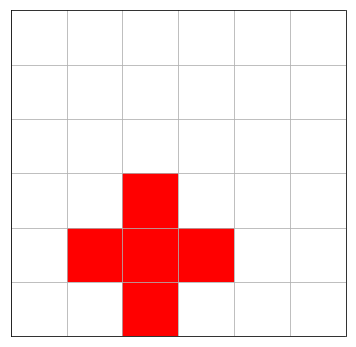

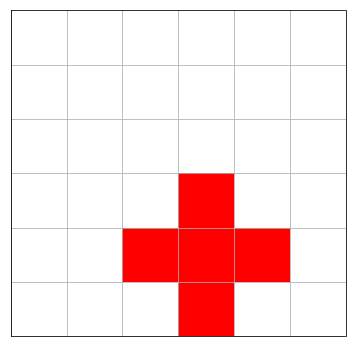

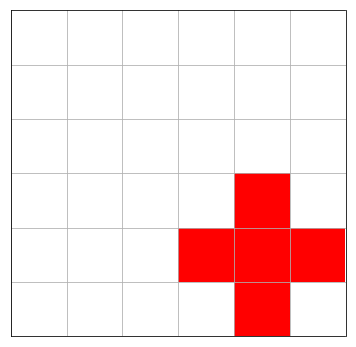

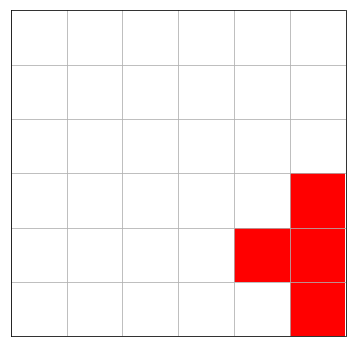

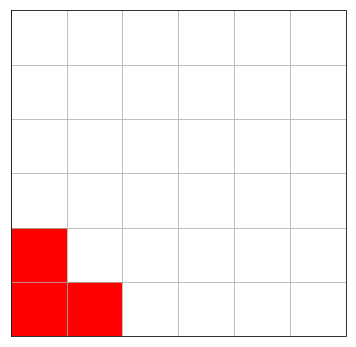

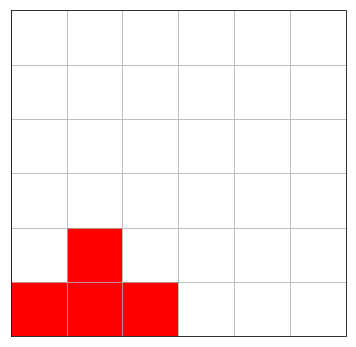

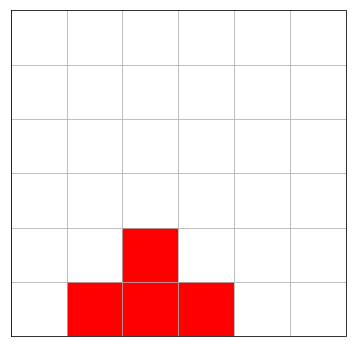

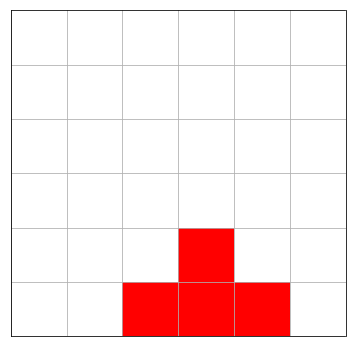

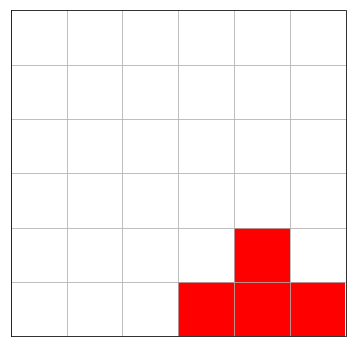

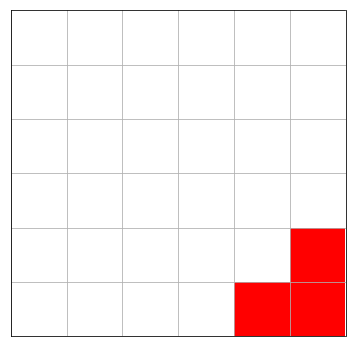

In [7]:
for p_state in push_state:
    display_state(n, m, p_state, 'red')

### 4.2 方程式を作成
$\mathrm{push\_pattern} * x = \mathrm{bord\_state}$ となる$x$を求める。

#### 4.2.1 アプローチ1 全探索 (※非推奨)
**最大 $n,m=10$ で計算量が $O(10^{30})$ となるのでやめましょう。**

```python
result = []
for p in itertools.product([0,1], repeat=n*m):
    res = np.array(list(map(lambda x:x%2, np.sum(push_state*p, axis=1))))
    if np.allclose(bord_state, res):
        result.append(p)
        
print(result)
```

#### 確認

```python
def update_state(b_state, p_state):
    return np.array(list(map(lambda x:x%2, b_state+p_state)))

res = sorted(result, key=lambda p:len(p))[0]
print(f'操作回数 : {len([r for r in res if r])}')

new_state = bord_state
display_state(n, m, new_state)

if result:
    for i,val in enumerate(res):
        if val:
            print(i)
            new_state = update_state(new_state,push_state[i])
            display_state(n, m, new_state)
else:
    print("解は存在しない。")
```

#### 4.2.2 アプローチ2 最上段の組み合わせ$2^n$から考える

In [8]:
def update_state(b_state, p_state):
    return np.array(list(map(lambda x:x%2, b_state+p_state)))

def check_state(b_state):
    """全ての要素が0(消灯)ならTrue,それ以外(1つ以上の要素が1(点灯))はFalse"""
    return ~np.any(b_state)

In [9]:
result = []

# 最上段の組み合わせのiteration
for p in itertools.product([0,1], repeat=n):
    
    # 初期化
    new_state = bord_state
    tmp_push = []
    
    # 組み合わせの通りに操作
    for i,_p in enumerate(p):
        if _p:
            new_state = update_state(new_state, push_state[i])
            #display_state(n, m, new_state)
            tmp_push.append(1)
        else:
            tmp_push.append(0)
    
    # 各行の1マス上のマスを消すような操作
    for i in range(m-1):
        for j in range(n):
            if new_state[i * m + j] == 1:
                new_state = update_state(new_state, push_state[(i+1)*m + j])
                #display_state(n, m, new_state)
                tmp_push.append(1)
            else:
                tmp_push.append(0)
                
    if check_state(new_state):
        result.append(tmp_push)
    
    #display_state(n, m, new_state)

操作回数 : 16


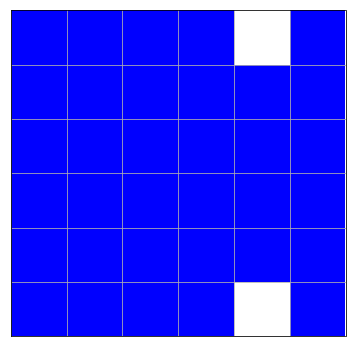

1


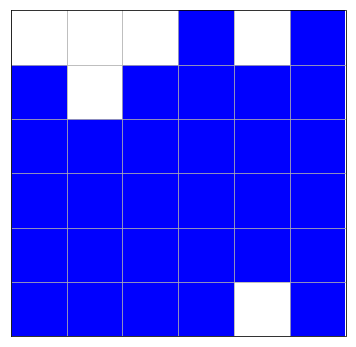

3


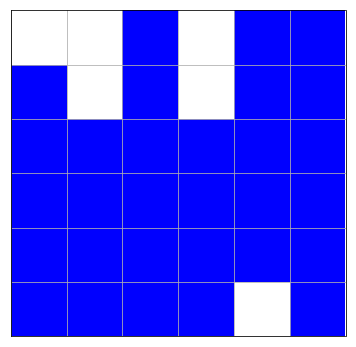

5


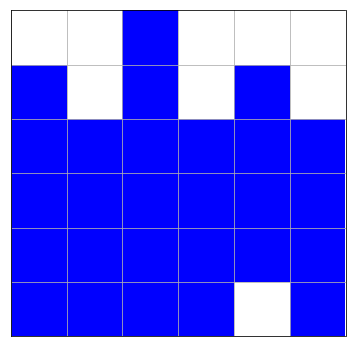

8


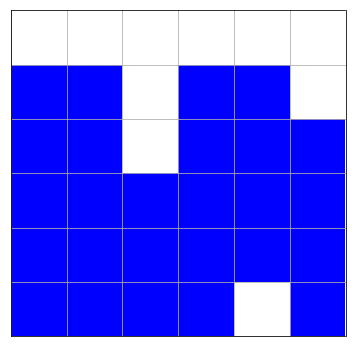

12


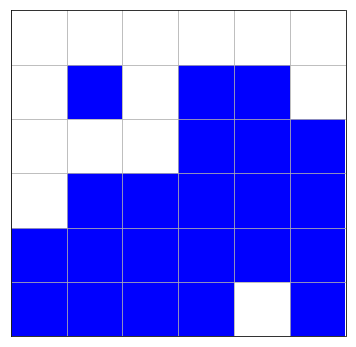

13


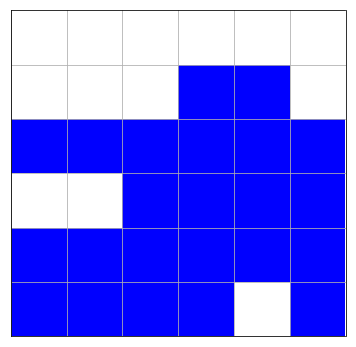

15


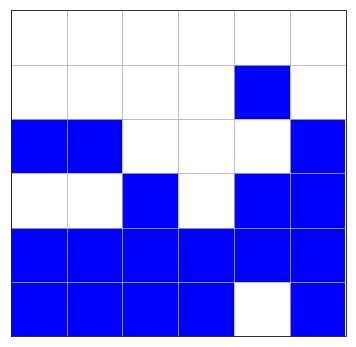

16


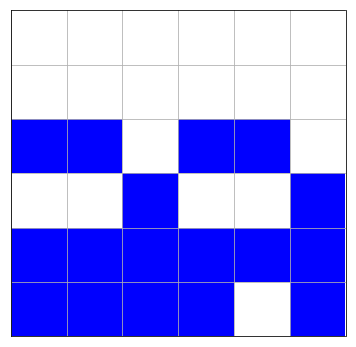

18


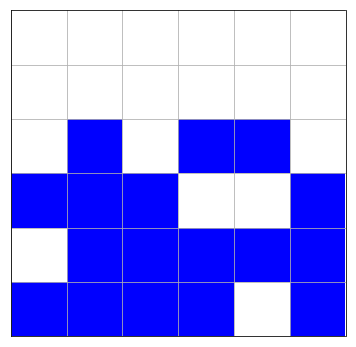

19


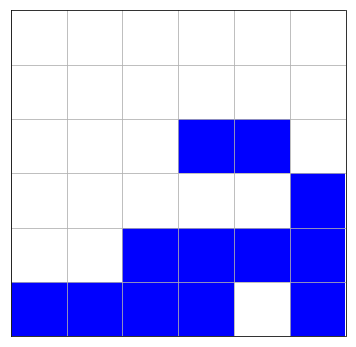

21


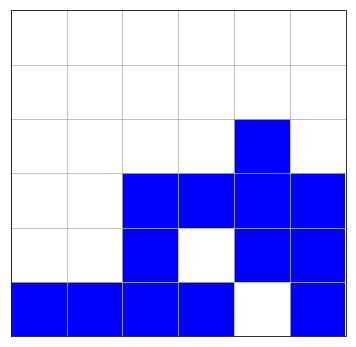

22


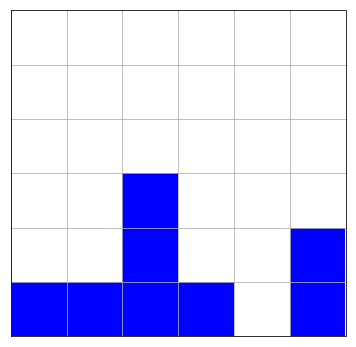

26


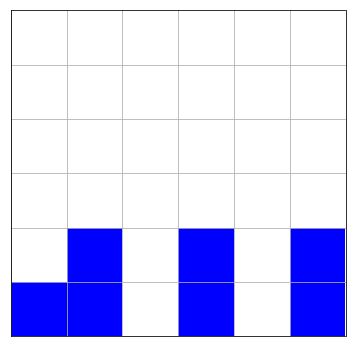

31


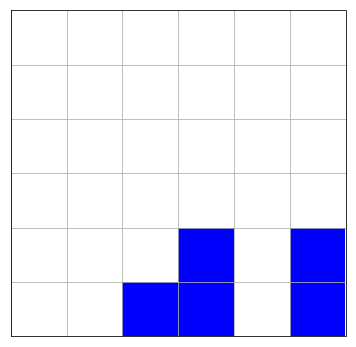

33


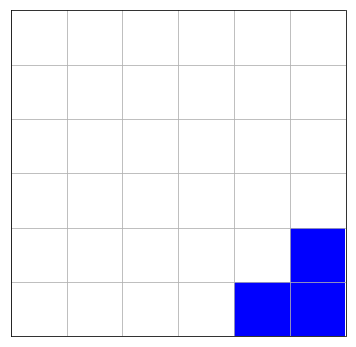

35


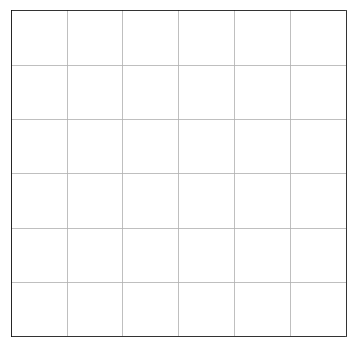

In [10]:
if result:
    res = sorted(result, key=lambda p:len(p))[0]
    print(f'操作回数 : {len([r for r in res if r])}')

    new_state = bord_state
    display_state(n, m, new_state)

    for i,val in enumerate(res):
        if val:
            print(i)
            new_state = update_state(new_state,push_state[i])
            display_state(n, m, new_state)
else:
    print("解は存在しない。")

#### 4.3 アプローチ3 方程式を解く
やる気が出たら頑張ります。